In [2]:
from ipywidgets import interact, interactive, interact_manual

from matplotlib import pyplot as plt
from numpy.linalg import svd
import numpy as np

%matplotlib inline

In [7]:
train = np.loadtxt(r'../data/MNIST_train_small.csv', delimiter=',')[:,1:]

def compress_image(k):
    image= train[12].reshape(28, 28)
    original_shape = image.shape
    reconst_img,s = compress_svd(image, k)
    fig,axes = plt.subplots(1, 2, figsize=(8,5))
    axes[0].plot(s)
    compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
    axes[1].set_title("compression ratio={:.2f}".format(compression_ratio)+"%")
    axes[1].imshow(reconst_img,cmap='gray')
    axes[1].axis('off')
    fig.tight_layout()

def compress_svd(image, k):
    """
    SVD decomposition, trucating image using k singular values
    returns:
        reconstructed matrix
        matrix sigma with singular values
    """
    U, sigma, V = svd(image, full_matrices=False)
    reconst_matrix = np.dot(U[:,:k], np.dot(np.diag(sigma[:k]), V[:k,:]))
    print(reconst_matrix.shape)
    return reconst_matrix, sigma

(28, 28)


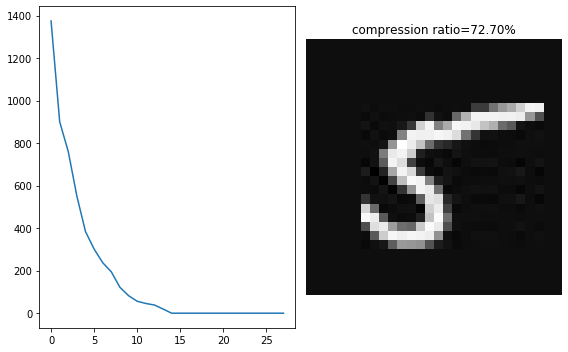

In [8]:
interact(compress_image, k=(1,20));

In [5]:
for k in range(1, 11):
    imgs_trunc = []
    for img in train:
        img_r = img.reshape(28, 28)
        img_trunc, _ = compress_svd(img.reshape(28, 28), k)
        img_trunc = img_trunc.flatten().astype(int)
        imgs_trunc.append(img_trunc)
    np.savetxt(f'../data/train_{k}.csv', np.array(imgs_trunc), delimiter=',')

In [38]:
train_set = ['../data/train_3.csv', './data/train_4.csv', './data/train_5.csv', 
             './data/train_6.csv', './data/train_7.csv', './data/train_8.csv', 
             './data/train_9.csv', './data/train_10.csv']
dist = "euclidian"
 
for t_set in train_set:
    train = np.loadtxt(t_set, delimiter=',')
    print(train.shape)

(3000, 784)


OSError: ./data/train_4.csv not found.

In [6]:
test[2]

NameError: name 'test' is not defined